# Scenario:

### You have been retained by a haulage company to analyse a dataset based on data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurised air that are utilized in various functions in a truck, such as braking and gear changes. The dataset’s  positive class consists of component failures for a specific component of the APS system.

### The negative class consists of trucks with failures for components not related to the APS. The data consists  of a subset of all available data, selected by experts. This analysis will help determine the investment strategy for the company in the upcoming year.

### All data wrangling, analysis, and visualizations must generated using python.

The companies CTO also requires you to rationalize all the decisions that you have made in your report.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)
from sklearn.impute import KNNImputer
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from imblearn import over_sampling
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,KFold

### This is a binary classification problem.

### The dataset’s  positive class (1) consists of component failures for a specific component of the APS system.

### The The dataset’s negative class (0) consists of trucks with failures for components not related to the APS.

### Hypothesis

### The hypothesis we are considering is that with our database and the data collected in it, we can analyse how much it costs the company to take our trucks to the mechanic by mistake.
### Using machine learning techniques, we carry out data classification algorithms that allow us to classify the problems we have with our trucks and, considering that every time we send our trucks to the mechanic by mistake it costs us €10 (false positives), and missing faulty trucks cost €500 (false negatives) in the long term.


## Index
1. Dataset overview

2. Data cleaning

> 2.1. NaN cleaning

> 2.2. Data types cleaning

> 2.3. Renaming of the column label

> 2.4. Datatype conversion of the column label

> 2.5. NaN values visual analysis and cleaning

> 2.6. Conversion of NaN values using the median

> 2.7. Outliers analysis

> 2.8. Data normalization

> 2.9. PCA Analysis

> 2.10. Correlation Analysis

3. Machine learning classification algorithms analysis

> 3.1. Classification algorithms performance comparison

> 3.2. Random Forest Optimization

> 3.3. Unbalanced Data Optimization

> 3.3.1 ROC and Precision-Recall curves

4. Conclusion

5. Machine learning classification algorithms analysis with dataset balanced

### Note
### We recommend using Google Calab if the computing power of this notebook is too high.
### Google Colab is a cloud-based notebook that allows machine learning and individuals to run their machine learning algorithms using cloud services provided by Google.

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#import os
#os.chdir("/content/drive/My Drive")
#!ls

1. Dataset overview

In [4]:
#df=pd.read_csv("/content/drive/MyDrive/CA1/DataPreparation/aps_failure_set.csv")
df=pd.read_csv("aps_failure_set.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [5]:
df.columns = df.columns.astype(str)

In [6]:
df.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [7]:
df.tail(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


In [8]:
df.shape

(60000, 171)

In [9]:
df = df.drop_duplicates()
df.shape

(60000, 171)

In [10]:
df.count()

class     60000
aa_000    60000
ab_000    60000
ac_000    60000
ad_000    60000
          ...  
ee_007    60000
ee_008    60000
ee_009    60000
ef_000    60000
eg_000    60000
Length: 171, dtype: int64

In [11]:
df.describe(include='all')

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,6.000000e+04,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,2,NaN,30,2062,1887,334,419,155,618,2423,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,neg,NaN,na,0,na,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,59000,NaN,46329,8752,14861,55543,55476,59133,58587,56181,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794
mean,NaN,5.933650e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.454301e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,8.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.077600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.866800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
unique_values = df.nunique()
unique_values

class         2
aa_000    22095
ab_000       30
ac_000     2062
ad_000     1887
          ...  
ee_007    30470
ee_008    24214
ee_009     9725
ef_000       29
eg_000       50
Length: 171, dtype: int64

2. Data cleaning

> 2.1. NaN cleaning

In [13]:
string_columns = df.select_dtypes(include=['object'])

# Loop through the selected string columns and print unique values
for column in string_columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'class': ['neg' 'pos']
Unique values in column 'ab_000': ['na' '0' '2' '4' '6' '8' '18' '10' '12' '16' '204' '24' '134' '90' '26'
 '14' '34' '52' '20' '22' '30' '36' '100' '48' '58' '32' '28' '44' '46'
 '68']
Unique values in column 'ac_000': ['2130706438' '0' '228' ... '8974' '123514' '2602']
Unique values in column 'ad_000': ['280' 'na' '100' ... '5286' '3608' '194868']
Unique values in column 'ae_000': ['0' '16' '104' 'na' '2' '222' '4' '290' '1286' '170' '6' '806' '1464'
 '274' '18' '8' '342' '64' '34' '192' '144' '176' '1512' '120' '58' '114'
 '460' '12' '112' '1314' '20' '550' '36' '1424' '180' '324' '204' '254'
 '106' '154' '92' '256' '202' '352' '26' '124' '2240' '466' '778' '28'
 '100' '14' '276' '42' '82' '22' '384' '282' '386' '98' '164' '108' '86'
 '38' '266' '1056' '134' '10' '200' '150' '326' '350' '398' '424' '32'
 '128' '752' '314' '732' '2312' '400' '158' '668' '30' '212' '224' '950'
 '4726' '60' '226' '388' '640' '258' '62' '206' '44' '414' '45

Unique values in column 'ay_004': ['0' '42124' '15198' ... '1434' '3480' '13676']
Unique values in column 'ay_005': ['469014' '71510' '0' ... '45114' '119742' '105702']
Unique values in column 'ay_006': ['4239660' '772720' '870456' ... '99120' '4445146' '1433988']
Unique values in column 'ay_007': ['703300' '1996924' '239798' ... '2542338' '1370596' '1205298']
Unique values in column 'ay_008': ['755876' '99560' '1450312' ... '1928' '4705948' '127100']
Unique values in column 'ay_009': ['0' 'na' '11548' '182060' '50400' '460' '93998' '2802' '55132' '10'
 '5866' '2' '13500' '268' '20' '103798' '17014' '52026' '194' '58064'
 '6494' '1914' '36' '76402' '18324' '752' '24258' '2504' '54' '101138'
 '19806' '86' '13232' '34' '8' '28730' '7002' '1072' '24734' '967378'
 '30676' '41510' '306772' '14374' '32438' '3086' '4860' '68078' '64528'
 '454' '13302' '119962' '11762' '9266' '268832' '199158' '4' '17002'
 '20892' '11026' '1744' '104922' '14396' '386034' '5498' '126' '1200'
 '131380' '27704' '

Unique values in column 'ch_000': ['0' 'na' '2']
Unique values in column 'ci_000': ['5245752' '2291079.36' '2322692.16' ... '123344.64' '4776505.92'
 '2480113.92']
Unique values in column 'cj_000': ['0' '5602235.52' '3987438.72' ... '2831745.6' '25016.64' '106006.08']
Unique values in column 'ck_000': ['916567.68' '643536.96' '236099.52' ... '1529548.8' '1048805.76'
 '389530.56']
Unique values in column 'cl_000': ['6' '0' '2' '142' 'na' '10' '4' '36' '26' '144' '150' '52' '32' '80' '14'
 '128' '48' '20' '38' '8' '12' '18944' '64' '1086' '18' '882' '680' '72'
 '662' '86' '84' '58' '1130' '22' '98304' '50' '46' '24576' '298' '28'
 '56' '184' '340' '30' '724' '374' '654' '82' '16' '314' '158' '126' '40'
 '320' '76' '70' '4100' '118' '90' '7168' '172' '152' '54' '55296' '162'
 '2108' '420' '1216' '218' '446' '136' '44' '250' '24' '574' '130' '2834'
 '182' '196' '590' '198' '774' '792' '100' '634' '146' '94' '6144' '992'
 '114' '302' '432' '14336' '784' '2198' '42' '89600' '88064' '62' '110

Unique values in column 'dc_000': ['5330690' 'na' '2341048' ... '124152' '4858834' '2506446']
Unique values in column 'dd_000': ['4732' '3312' '1494' ... '39558' '5344' '36416']
Unique values in column 'de_000': ['1126' '522' '152' ... '3448' '2914' '6240']
Unique values in column 'df_000': ['0' '40' 'na' '680' '360' '30' '10' '90' '119600' '170' '400' '280' '70'
 '1217240' '690' '50' '1590' '850' '320' '4334400' '380' '6172990' '290'
 '80' '130' '670' '1389590' '10430' '840' '12630' '390' '60' '9490' '100'
 '350' '120' '15770' '180' '1840' '2350' '960' '1500' '16910' '13670'
 '6650' '190' '110' '14780' '2940' '2480' '142420' '230' '660' '3250'
 '2640' '410' '248770' '330' '1270' '41710' '210' '23780' '2380' '11050'
 '111090' '720' '430' '820' '2030' '1280' '630270' '570' '173220' '20'
 '2250' '5080' '3012900' '9710' '250' '5720' '550' '200' '910' '1919810'
 '470' '725890' '3340' '311250' '760' '440' '4290510' '1120' '340' '27510'
 '520' '620' '140' '973040' '1220' '9220' '1080' '12710

Unique values in column 'ef_000': ['0' '4' 'na' '2' '8' '6' '84' '22' '134' '26' '10' '350' '320' '40' '30'
 '20' '482' '166' '12' '276' '252' '18' '82' '14' '236' '144' '86' '362'
 '74']
Unique values in column 'eg_000': ['0' '32' 'na' '164' '54' '4' '2' '10' '6' '14' '12' '8' '144' '68' '86'
 '26' '20' '28' '16' '34' '94' '222' '36' '892' '48' '72' '152' '78' '910'
 '70' '172' '46' '80' '182' '24' '56' '102' '430' '42' '18' '162' '40'
 '200' '1146' '44' '108' '92' '22' '606' '416']


In [14]:
df2 = df.replace(to_replace=['nan', 'na'], value=np.NaN)
df2.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


> 2.2. Data types cleaning

In [15]:
column_dtypes = df2.dtypes

# Print the data types
print(column_dtypes)

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object


In [16]:
df2.describe(include='all')

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,6.000000e+04,13671,56665,45139,57500,57500,59329,59329,59329,...,59329,59329,59329,59329,59329,59329,59329,59329,57276,57277
unique,2,NaN,29,2061,1886,333,418,154,617,2422,...,34488,31711,35188,36288,31795,30469,24213,9724,28,49
top,neg,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,59000,NaN,10977,8752,2009,55543,55476,59133,58587,56181,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794
mean,NaN,5.933650e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.454301e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,8.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.077600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.866800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> 2.3. Renaming of the column label

In [17]:
df3=df2.rename(columns={"class": "classification"})
df3.columns

Index(['classification', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000',
       'af_000', 'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [18]:
df3['classification'].value_counts()

neg    59000
pos     1000
Name: classification, dtype: int64

> 2.4. Datatype conversion of the column label.

In [19]:
df3['classification'] = df3.classification.map({'neg':0, 'pos':1})

In [20]:
df3['classification'].value_counts()

0    59000
1     1000
Name: classification, dtype: int64

In [21]:
df3.describe(include='all')

,classification,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000.000000,6.000000e+04,13671,56665,45139,57500,57500,59329,59329,59329,...,59329,59329,59329,59329,59329,59329,59329,59329,57276,57277
unique,NaN,NaN,29,2061,1886,333,418,154,617,2422,...,34488,31711,35188,36288,31795,30469,24213,9724,28,49
top,NaN,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,NaN,NaN,10977,8752,2009,55543,55476,59133,58587,56181,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794
mean,0.016667,5.933650e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.128020,1.454301e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,8.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.077600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.000000,4.866800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> 2.5. NaN values visual analysis and cleaning.

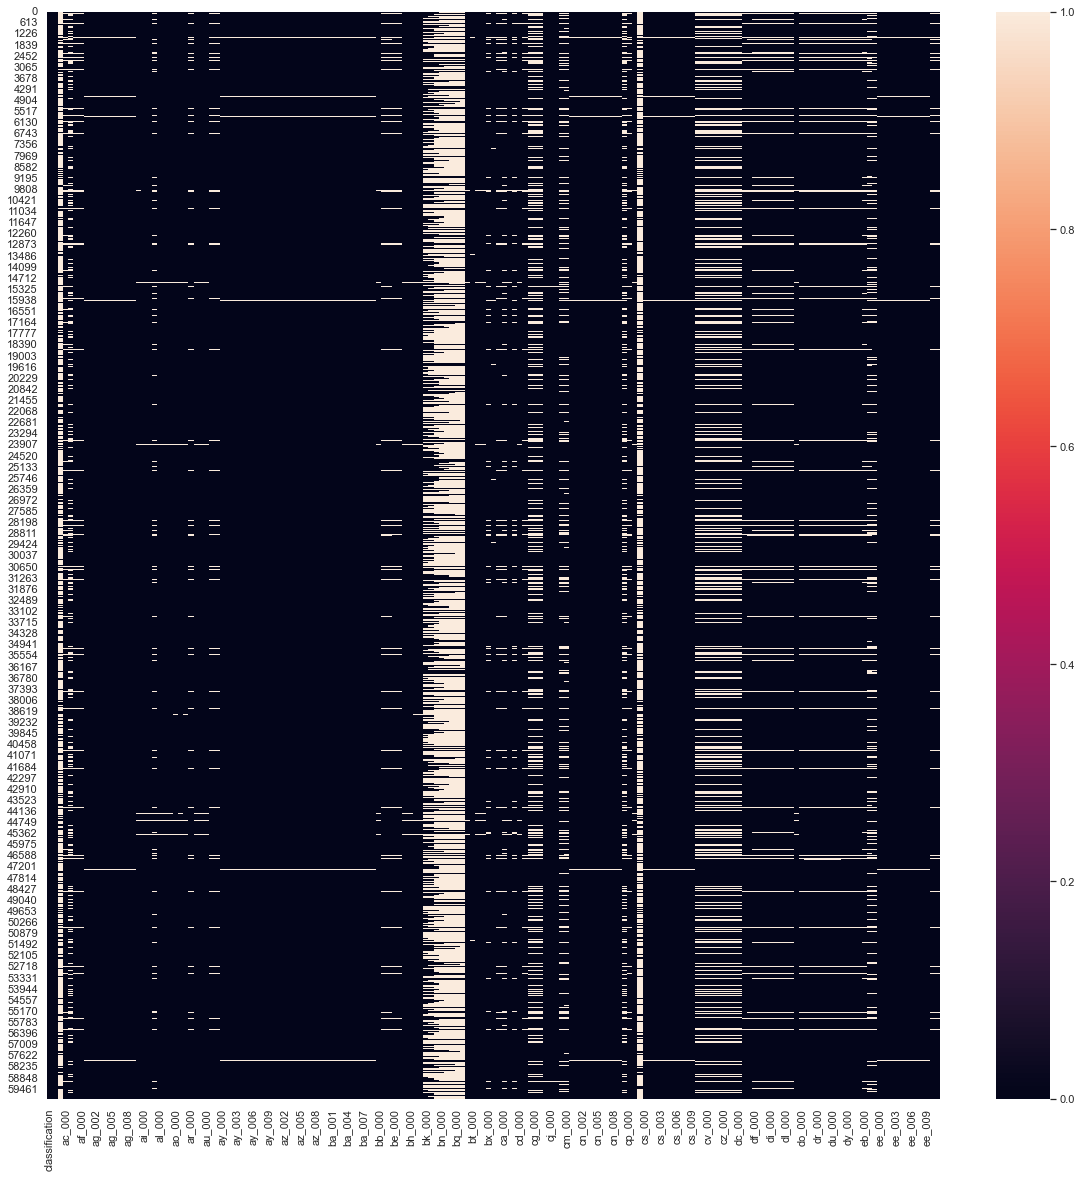

In [22]:
sns.set(rc={'figure.figsize':(20,20)})
plot = sns.heatmap(df3.isnull())
plt.show(plot)

<AxesSubplot:>

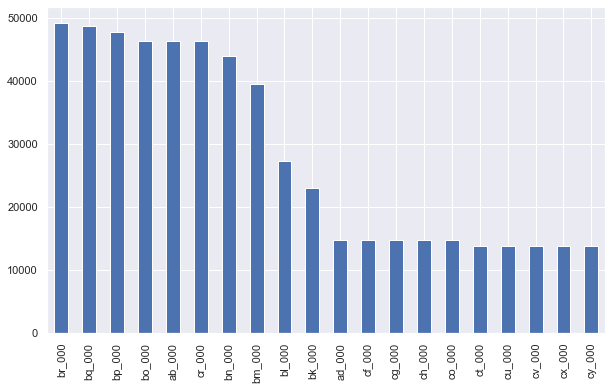

In [23]:
df3.isnull().sum().nlargest(20).plot(kind='bar', figsize=(10, 6))

In [24]:
df3.isnull().any()

classification    False
aa_000            False
ab_000             True
ac_000             True
ad_000             True
                  ...  
ee_007             True
ee_008             True
ee_009             True
ef_000             True
eg_000             True
Length: 171, dtype: bool

In [25]:
df3.isnull().any().value_counts()

True     169
False      2
dtype: int64

In [26]:
df3.isnull().sum()

classification        0
aa_000                0
ab_000            46329
ac_000             3335
ad_000            14861
                  ...  
ee_007              671
ee_008              671
ee_009              671
ef_000             2724
eg_000             2723
Length: 171, dtype: int64

In [27]:
df3.isnull().sum().nlargest(10)

br_000    49264
bq_000    48722
bp_000    47740
bo_000    46333
ab_000    46329
cr_000    46329
bn_000    44009
bm_000    39549
bl_000    27277
bk_000    23034
dtype: int64

### We have decided to removed those columns where the amount of Nan values is more than 70%, in order to have a database the most clear possible to our prediction.

### Columns where missing values are more than 70% -> 60000x0.7=42000

In [28]:
min_non_null = 60000*0.7

df4 = df3.dropna(axis=1, thresh=min_non_null)

In [29]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Columns: 161 entries, classification to eg_000
dtypes: int64(2), object(159)
memory usage: 74.2+ MB


In [30]:
df4['classification'].value_counts()

0    59000
1     1000
Name: classification, dtype: int64

In [31]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Columns: 161 entries, classification to eg_000
dtypes: int64(2), object(159)
memory usage: 74.2+ MB


In [32]:
df4.describe()

,classification,aa_000
count,60000.000000,6.000000e+04
mean,0.016667,5.933650e+04
std,0.128020,1.454301e+05
min,0.000000,0.000000e+00
25%,0.000000,8.340000e+02
50%,0.000000,3.077600e+04
75%,0.000000,4.866800e+04
max,1.000000,2.746564e+06


In [33]:
df3.shape

(60000, 171)

In [34]:
df4.shape

(60000, 161)

In [35]:
df4.isnull().sum().nlargest(10)

ad_000    14861
cf_000    14861
cg_000    14861
ch_000    14861
co_000    14861
ct_000    13808
cu_000    13808
cv_000    13808
cx_000    13808
cy_000    13808
dtype: int64

> 2.6. Conversion of NaN values using the median.

### We chose to use the median to deal with NaN values because it is more robust, not sensitive to outliers, and therefore used when data is skewed.

In [36]:
df5 = df4
medians = df4.median()
#df4=df4.fillna(medians, inplace=True)
df5=df5.fillna(medians)

In [37]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Columns: 161 entries, classification to eg_000
dtypes: int64(2), object(159)
memory usage: 74.2+ MB


In [38]:
df5['classification']=df3['classification']

In [39]:
df5.columns

Index(['classification', 'aa_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002', 'ag_003',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=161)

In [40]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Columns: 161 entries, classification to eg_000
dtypes: int64(2), object(159)
memory usage: 74.2+ MB


In [41]:
print("Percentage of Scania trucks with failures for components not related to the APS \n", (df5[df5['classification']== 0].shape[0] / df5.shape[0]) * 100)
print("Percentage of Scania trucks with failures for components related to the APS \n", (df5[df5['classification']== 1].shape[0] / df5.shape[0]) * 100)

Percentage of Scania trucks with failures for components not related to the APS 
 98.33333333333333
Percentage of Scania trucks with failures for components related to the APS 
 1.6666666666666667


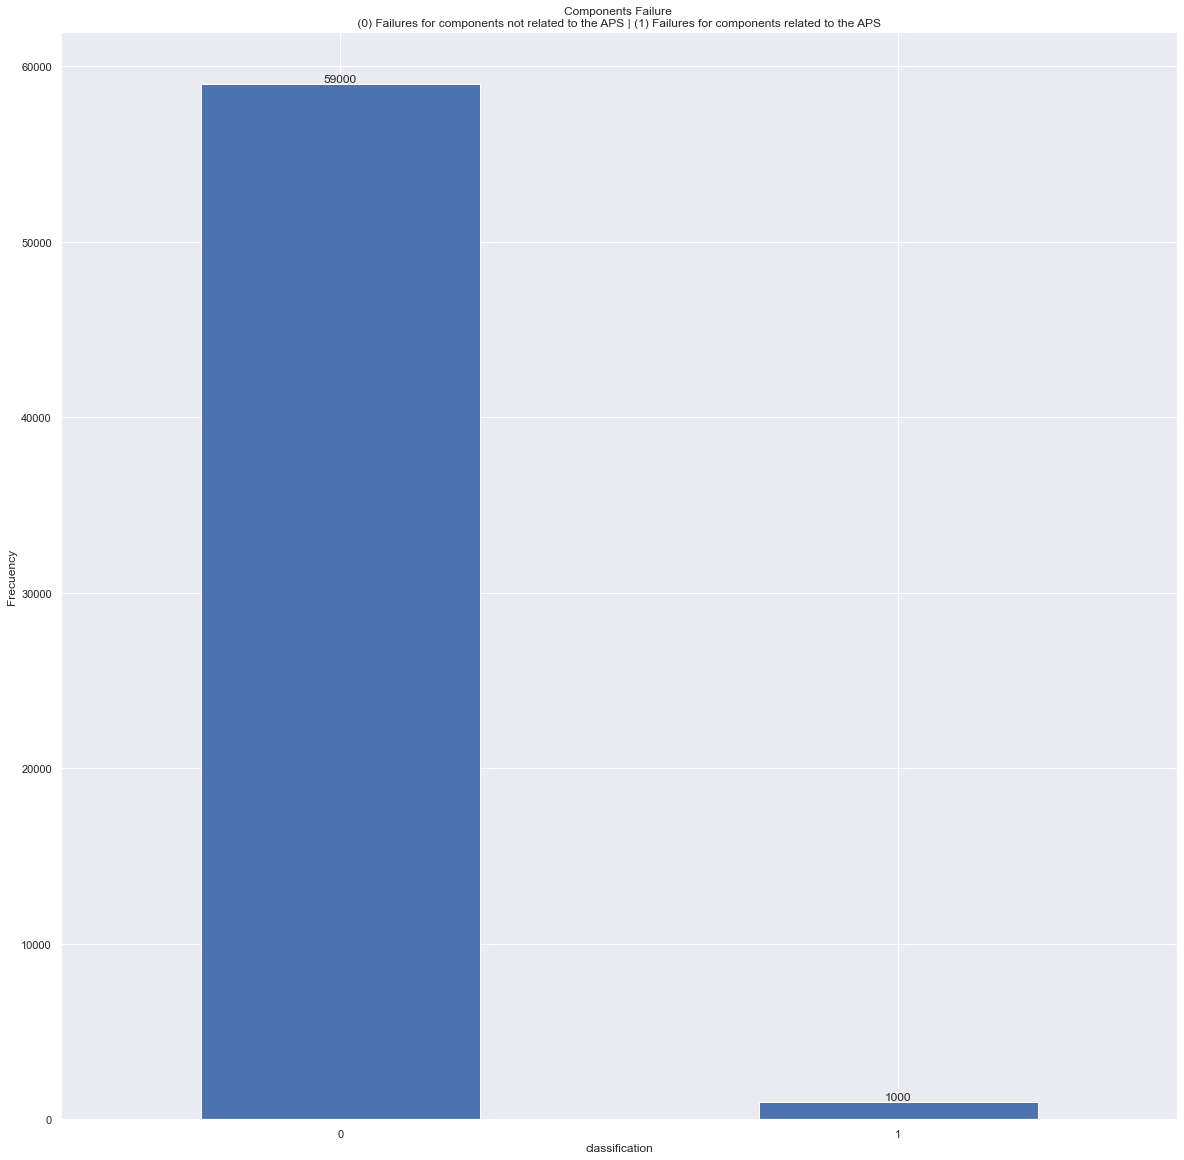

In [42]:
Count = pd.value_counts(df5['classification'], sort = True).sort_index()
Count.plot(kind = 'bar')
plt.title("Components Failure \n (0) Failures for components not related to the APS | (1) Failures for components related to the APS ")
plt.xlabel("classification")
plt.ylabel("Frecuency")

for index, value in enumerate(Count):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=360)
plt.show()

> 2.8. Data normalization.

### We have decided to perform data normalization techniques as we aim to use linear classification algorithms that perform better under these conditions.

In [43]:
scaler = MinMaxScaler()

# Fit and transform the numerical data
df5[df5.columns] = scaler.fit_transform(df5)

In [44]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Columns: 161 entries, classification to eg_000
dtypes: float64(161)
memory usage: 74.2 MB


> 2.9. PCA Analysis.

### PCA is a technique that seeks the optimal number of features to achieve the best outcome from our algorithms. Having too many features may lead to poor algorithm performance.

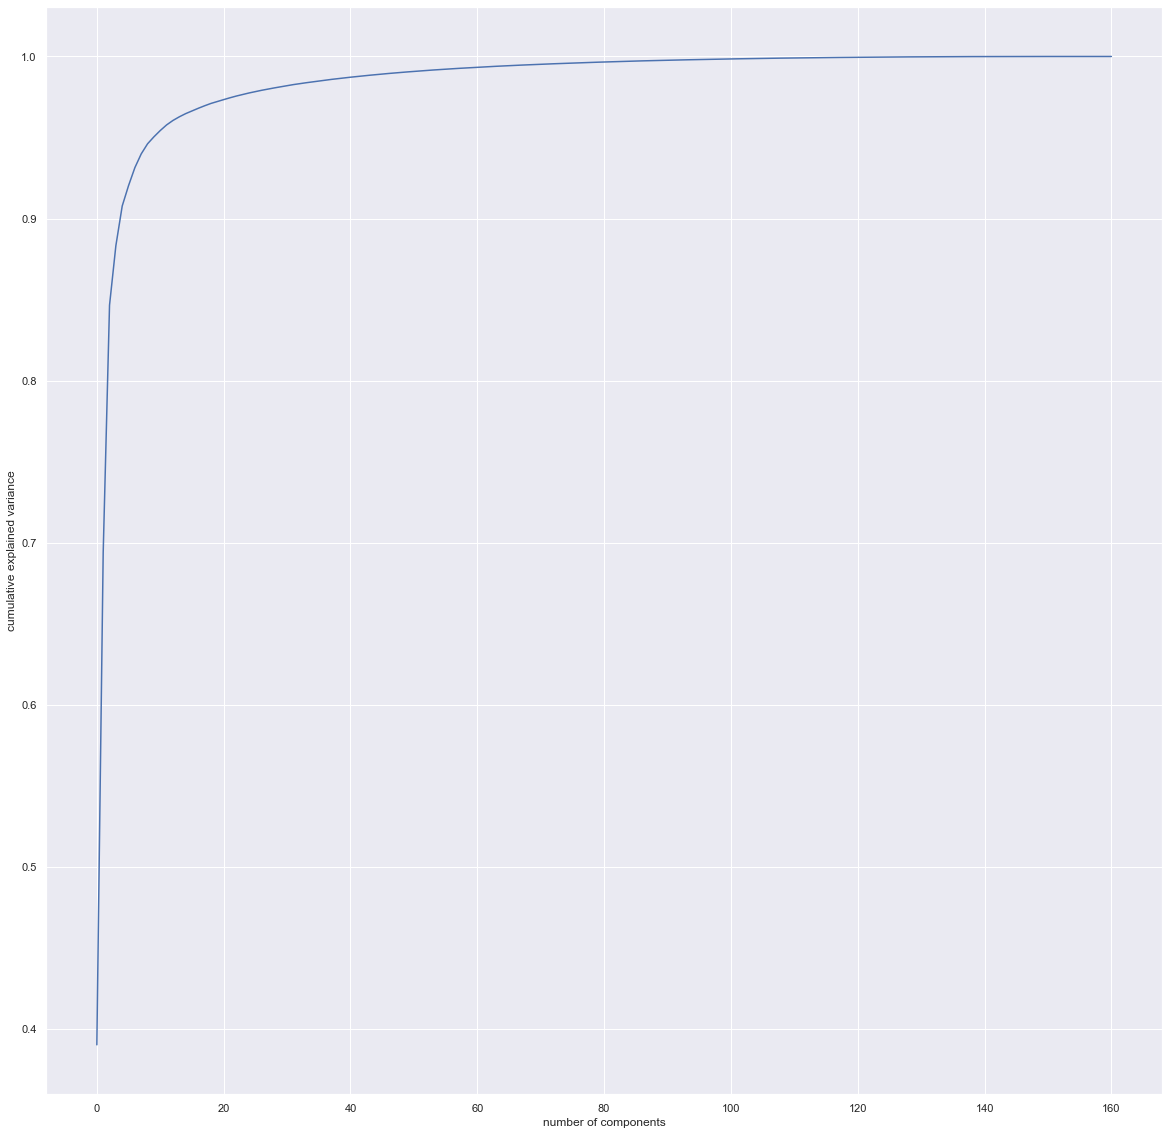

In [45]:
df5_no_label = df5.drop(df5["classification"])
pca = PCA().fit(df5_no_label)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### From our PCA analysis, we have determined that the optimal number of features is 80.

In [46]:
pca = PCA(80)
projected = pca.fit_transform(df5_no_label)

In [47]:
projected.shape

(59998, 80)

In [48]:
df5_pca= pd.DataFrame(projected)

df5_pca["classification"] = df5["classification"]

In [49]:
df5_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59998 entries, 0 to 59997
Data columns (total 81 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   0               59998 non-null  float64
 1   1               59998 non-null  float64
 2   2               59998 non-null  float64
 3   3               59998 non-null  float64
 4   4               59998 non-null  float64
 5   5               59998 non-null  float64
 6   6               59998 non-null  float64
 7   7               59998 non-null  float64
 8   8               59998 non-null  float64
 9   9               59998 non-null  float64
 10  10              59998 non-null  float64
 11  11              59998 non-null  float64
 12  12              59998 non-null  float64
 13  13              59998 non-null  float64
 14  14              59998 non-null  float64
 15  15              59998 non-null  float64
 16  16              59998 non-null  float64
 17  17              59998 non-null 

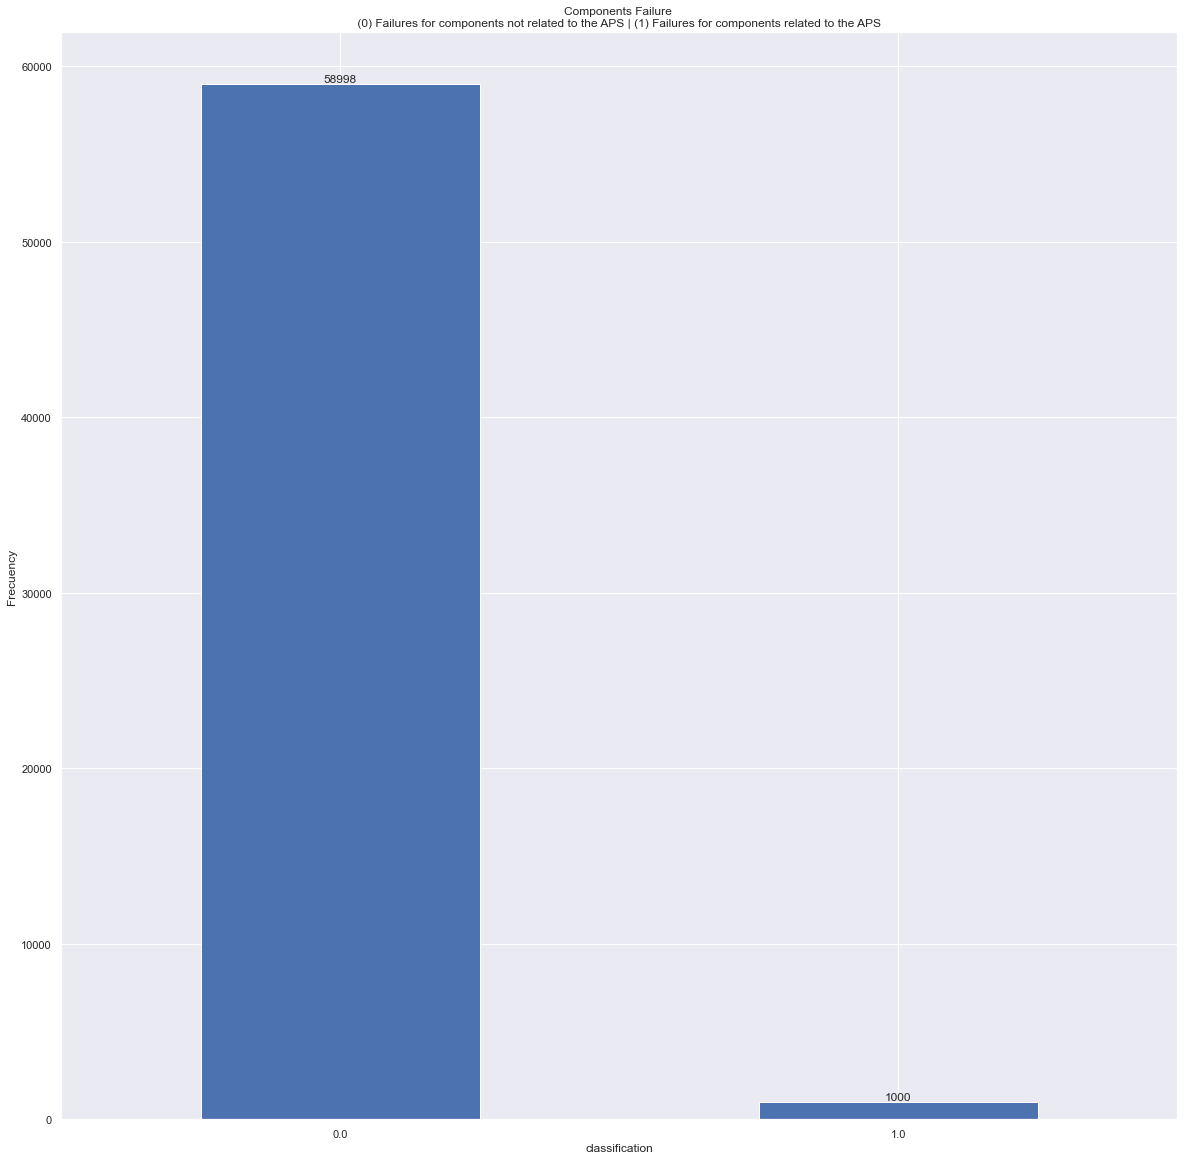

In [50]:
Count = pd.value_counts(df5_pca['classification'], sort = True).sort_index()
Count.plot(kind = 'bar')
plt.title("Components Failure \n (0) Failures for components not related to the APS | (1) Failures for components related to the APS ")
plt.xlabel("classification")
plt.ylabel("Frecuency")

for index, value in enumerate(Count):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=360)
plt.show()

In [51]:
df5_pca.shape

(59998, 81)

3. Machine learning classification algorithms analysis.

> 3.1. Classification algorithms performance comparison.

In [52]:
df5_array = df5_pca.values

In [53]:
X = df5_array[:,0:80]
y = df5_array[:,80]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [54]:
models = []
# models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
# # models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(gamma='auto')))
models.append(('RF',RandomForestClassifier(n_estimators= 500 , max_depth=10)))

In [ ]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

In [ ]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
# modelLR = LogisticRegression(solver='liblinear', multi_class='ovr')
# modelLR.fit(X_train, Y_train)
# predictions = modelLR.predict(X_validation)

In [ ]:
# accuracy = accuracy_score(Y_validation, predictions)
# print("{:.2f}%".format(accuracy*100))
# confusion_mat=confusion_matrix(Y_validation, predictions)
# print(confusion_mat)
# print("Total cost = ", confusion_mat[0][1] * 10 + confusion_mat[1][0] * 500)

In [ ]:
# modelKK = KNeighborsClassifier()
# modelKK.fit(X_train, Y_train)
# predictions = modelKK.predict(X_validation)

In [ ]:
# accuracy = accuracy_score(Y_validation, predictions)
# print("{:.2f}%".format(accuracy*100))
# confusion_mat=confusion_matrix(Y_validation, predictions)
# print(confusion_mat)
# print("Total cost = ", confusion_mat[0][1] * 10 + confusion_mat[1][0] * 500)

### We have decided to use Random forest algorithms to classify our data.
### The Random Forest algorithms have accurately predicted 98.31% of the data test set. It is worth noting that the algorithms have shown a tendency to mispredict false negatives rather than false positives, with 203 out of 12,000 values being incorrectly identified.
### (12000 values=20% dataset=Test Data)

> 3.2. Random forest classification Analysis.

In [ ]:
modelRF = RandomForestClassifier(n_estimators= 500 , max_depth=10)
modelRF.fit(X_train, Y_train)
predictions = modelRF.predict(X_validation)

In [ ]:
accuracy = accuracy_score(Y_validation, predictions)
print("{:.2f}%".format(accuracy*100))
confusion_mat=confusion_matrix(Y_validation, predictions)
print(confusion_mat)
print("Total cost = ", confusion_mat[0][1] * 10 + confusion_mat[1][0] * 500)

> 3.3.1 ROC and Precision-Recall curves.

We are applaying this technique in order to reduce the amount of False Negatives.

### Precision means how correctly our model predict the label column.
### Recall means how correctly our model find all objects of the label column.
### ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
### Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.
### ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

In [ ]:
#CV for determining the best threshold
trail = 10
plot = []
for x in range(0,trail):
    train, test, y_tr, y_ts = train_test_split(X_train, Y_train, stratify = Y_train, train_size = 0.7)
    modelRF.fit(train,y_tr)
    pred = modelRF.predict_proba(test)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_ts, pred)
    thresholds = np.append(thresholds,1)

    costs = []
    for threshold in thresholds:
        y_pred_thres = pred > threshold
        c = confusion_matrix(y_ts,y_pred_thres)
        cost = c[0,1] * 10 + c[1,0] * 500
        costs.append(cost)

    plot.append({'threshold': thresholds, 'precision':precision,'recall': recall, 'costs':costs})


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
for x in plot:
    plt.plot(x['threshold'],x['precision'],'r')
    plt.plot(x['threshold'],x['recall'],'g')

plt.legend(('precision','recall'))
plt.xlabel('Threshold')
plt.ylabel("Precision/Recall")

plt.subplot(1,3,3)
for x in plot:
    plt.plot(x['threshold'],x['costs'],'y')
plt.legend(('costs'))
plt.xlabel('Threshold')
plt.ylabel("cost")
plt.show()

### Due to a luck of knowledge on this topic, we aim to develop a more solid knowledge on how to analyse and perform ROC and Precision-Recall curves.
### We are deciding to skip this analisys and concluding with the performance obtained from our Random Forest algorithm in previous steps.

In [ ]:
modelRF = RandomForestClassifier(n_estimators= 500 , max_depth=10)
modelRF.fit(X_train, Y_train)
predictions = modelRF.predict(X_validation)

In [ ]:
accuracy = accuracy_score(Y_validation, predictions)
print("{:.2f}%".format(accuracy*100))
confusion_mat=confusion_matrix(Y_validation, predictions)
print(confusion_mat)
print("Total cost = ", confusion_mat[0][1] * 10 + confusion_mat[1][0] * 500)

### 4. Conclusion

### Performing machine learning and classification algorithms, we have developed an analysis that has enabled us to create a model with the ability to:
- Minimise the occurrence of missed maintenance of our lorries with specific APS system component failures by bringing them to the mechanic promptly and regularly.
- Identify that this happens in only 1.72% (where 12000=100% and 203=1.72%) of the occasions when we miss a faulty tuck.

### Considering that every time we send our trucks to the mechanic by mistake it costs us €10 (false positives), and missing faulty trucks cost €500 (false negatives) in the long term.
## Cost=0x10+203x500=€101500



### 5. Machine learning classification algorithms analysis with dataset balanced

In [ ]:
X = df5_pca.drop(['classification'], axis=1)
y = df5_pca['classification']
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
df5_pca.columns = df5_pca.columns.astype(str)

### 5.1 Undersampling the negative class

In [ ]:
# train_neg_sampled = X_train[X_train['classification'] == 0].sample(n = 1000,random_state = 42)
# train_Sampled = X_train[X_train['classification'] == 1].append(train_neg_sampled)

In [ ]:
neg_sample_size = 3 * len(df5_pca[df5_pca['classification'] == 1])
train_neg_sampled = df5_pca[df5_pca['classification'] == 0].sample(n=neg_sample_size, random_state=42)
train_sampled = pd.concat([df5_pca[df5_pca['classification'] == 1], train_neg_sampled])

In [ ]:
Count = pd.value_counts(train_sampled['classification'], sort = True).sort_index()
Count.plot(kind = 'bar')
plt.title("Components Failure \n (0) Failures for components not related to the APS | (1) Failures for components related to the APS ")
plt.xlabel("classification")
plt.ylabel("Frecuency")

for index, value in enumerate(Count):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=360)
plt.show()

In [ ]:
print("Shape of the train data after under sampling the negative class", train_sampled.shape[0])

### 5.2 Upsampling the positive class using Smote Technique

In [ ]:
sm = over_sampling.SMOTE(sampling_strategy= 1.0)
train_sampled_smote, Y_train = sm.fit_resample(X_train,Y_train)

In [ ]:
print("Shape of train data after upsampling the positive class by smote", train_sampled_smote.shape)

### 5.3 Standardizing the data

In [ ]:
std = StandardScaler()
train_std = std.fit_transform(train_sampled_smote)
test_std = std.transform(X_validation)

### 5.4 Random Forest

In [ ]:
# model fitting and hyperparameter tuning using gridsearch
x_cfl=RandomForestClassifier()
#weights = np.linspace(0.05, 0.95, 20)
prams={
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10]#,'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    
    
}
model=GridSearchCV(x_cfl,param_grid=prams,verbose=10,n_jobs=-1,scoring='f1',cv=5)
model.fit(train_std,Y_train)
print("Best estimator is", model.best_params_)

In [ ]:
# model fitting using the best parameter
clf = RandomForestClassifier(n_estimators= 1000 , max_depth=10)
clf.fit(train_std,Y_train)
# Predict labels for the validation set
y_pred = clf.predict(test_std)

# Calculate the confusion matrix for the validation set
con_mat = confusion_matrix(Y_validation, y_pred)

# Print the confusion matrix and other statistics
print("-"*117)
print('Confusion Matrix: ', '\n', con_mat)
print("-"*117)
print("Type 1 error (False Positive) = ", con_mat[0][1])
print("Type 2 error (False Negative) = ", con_mat[1][0])
print("-"*117)
print("Total cost = ", con_mat[0][1] * 10 + con_mat[1][0] * 500)
print("-"*117)

In [ ]:
#CV for determining the best threshold
trail = 10
plot = []
for x in range(0,trail):
    train, test, y_tr, y_ts = train_test_split(train_std, Y_train, stratify = Y_train, train_size = 0.7)
    clf.fit(train,y_tr)
    pred = clf.predict_proba(test)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_ts, pred)
    thresholds = np.append(thresholds,1)
      
    costs = []
    for threshold in thresholds:
        y_pred_thres = pred > threshold
        c = confusion_matrix(y_ts,y_pred_thres)
        cost = c[0,1] * 10 + c[1,0] * 500
        costs.append(cost)
        
    plot.append({'threshold': thresholds, 'precision':precision,'recall': recall, 'costs':costs})
    

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
for x in plot:
    plt.plot(x['threshold'],x['precision'],'r')
    plt.plot(x['threshold'],x['recall'],'g')
    
plt.legend(('precision','recall'))
plt.xlabel('Threshold')
plt.ylabel("Precision/Recall")

plt.subplot(1,3,3)
for x in plot:
    plt.plot(x['threshold'],x['costs'],'y')
plt.legend(('costs'))
plt.xlabel('Threshold')
plt.ylabel("cost")
plt.show()

- At 0.63, we observe that precision is almost more than 95% and recall is almost around 95%. We want our recall to be near to 100% and at the same time we also want our precision to be high.

In [ ]:
clf.fit(train_std,Y_train)
y_pred_prob = clf.predict_proba(test_std)[:,1]  > 0.63
con_mat =confusion_matrix (Y_validation, y_pred_prob)
print("-"*117)
print("Type 1 error (False Positive) = ", con_mat[0][1])
print("Type 2 error (False Negative) = ", con_mat[1][0])
print("-"*117)
print("Total cost = ", con_mat[0][1] * 10 + con_mat[1][0] * 500)
print("-"*117)

### References

matplotlib.org. (n.d.). matplotlib.pyplot.legend — Matplotlib 3.3.4 documentation. [online] Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html  [Accessed 27 Oct. 2023].

seaborn.pydata.org. (n.d.). seaborn.heatmap — seaborn 0.10.1 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.heatmap.html [Accessed 30 Oct. 2023].

Zach (2021). Pandas: How to Find Unique Values in a Column. [online] Statology. Available at: https://www.statology.org/pandas-unique-values-in-column [Accessed 1 Nov. 2023].

Scikit-learn (2018). sklearn.ensemble.RandomForestClassifier — scikit-learn 0.20.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html  [Accessed 1 Nov. 2023].

Brownlee, J. (2018). How to Use ROC Curves and Precision-Recall Curves for Classification in Python. [online] MachineLearningMastery.com. Available at: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python  [Accessed 2 Nov. 2023].

GitHub. (n.d.). APS-Failure-at-Scania-Trucks/aps_model.ipynb at master · mrunal46/APS-Failure-at-Scania-Trucks. [online] Available at: https://github.com/mrunal46/APS-Failure-at-Scania-Trucks/blob/master/aps_model.ipynb [Accessed 3 Nov. 2023].